In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/home/akhil/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1).values ## values- converts it into numpy array
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
## Step 1 : Creating tensors
# all your inputs and outputs ie. your independent and dependent features should be converted into tensors
# Your independent features needs to be converted into float tensor its very important
# with respect to your dependent features its not that important

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train) ## LongTensor dosent converts it into floating point 
y_test = torch.LongTensor(y_test)

In [8]:
### Creating our model from scratch

In [9]:
class Ann_Model(nn.Module):
    
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [10]:
# Initializing the ANN model

torch.manual_seed(20)
model = Ann_Model()

In [11]:
model.parameters

<bound method Module.parameters of Ann_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [12]:
### Backward Propagation -- Define the loss_function, define the optimizer
# Whenever you have multi class classification problem use cross entropy loss

In [13]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019213080406189
Epoch number: 21 and the loss : 0.609032392501831
Epoch number: 31 and the loss : 0.5917771458625793
Epoch number: 41 and the loss : 0.567970871925354
Epoch number: 51 and the loss : 0.5529040098190308
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310391783714294
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135970711708069
Epoch number: 101 and the loss : 0.5061254501342773
Epoch number: 111 and the loss : 0.49834105372428894
Epoch number: 121 and the loss : 0.49605482816696167
Epoch number: 131 and the loss : 0.4828638434410095
Epoch number: 141 and the loss : 0.4756038784980774
Epoch number: 151 and the loss : 0.48334601521492004
Epoch number: 161 and the loss : 0.4882742464542389
Epoch number: 171 and the loss : 0.4705790579319
Epoch number: 181 and the loss : 0.4763616621494293
Epoch number: 191 and the l

In [15]:
### Plotting the loss function

import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'loss')

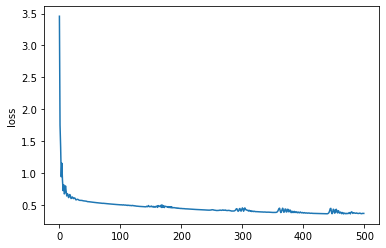

In [17]:
plt.plot(range(epochs), final_losses)
plt.ylabel('loss')

In [19]:
# Doing the prediction in x_test

In [22]:
predictions = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [23]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[92, 15],
       [13, 34]])

Text(33.0, 0.5, 'Predicted Values')

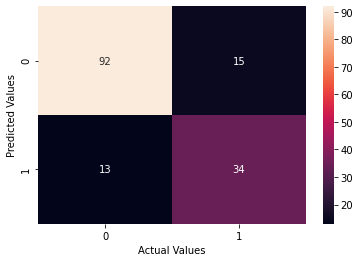

In [25]:
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [26]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
score

0.8181818181818182

In [27]:
### Saving the model

torch.save(model, 'diabetes.pt')

/home/akhil/anaconda3/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Ann_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [30]:
### Loading the model

In [28]:
model = torch.load('diabetes.pt')

In [29]:
model.eval()

Ann_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [31]:
### Prediction of new data point

list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [32]:
list1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [33]:
new_data = torch.tensor(list1)

In [35]:
### PRedicting new data using pytorch

with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.4343, 1.3914])
0
